In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib
import re
from datetime import datetime
from wordcloud import WordCloud 
import jieba
import jieba.analyse
from datetime import date

In [2]:
df_1 = pd.read_csv('./explore/FB_ci-1.csv')
df_2 = pd.read_csv('./explore/FB_ci-2.csv')
df_3 = pd.read_csv('./explore/FB_ci-3.csv')

In [3]:
len(df_1)+len(df_2)+len(df_3)

13471

合併資料集

關鍵字 :
和泰汽車、中華賓士、汎德永業、太古汽車、匯豐汽車、中華汽車、福特六和、台灣本田、鴻華先進、國瑞汽車、三陽工業

In [4]:
df_ = pd.concat([df_1,df_2,df_3],axis=0)
df_.drop(['dataSource', 'reaction_wow_count', 'reaction_haha_count',
       'ig_username', 'n', 'reaction_all_count', 'reaction_haha',
       'reaction_love', 'reaction_like', 'reaction_like_count',
       'engagement_score', 'reaction_sad_count', 'website', 'type',
       'share_count', 'fromid', 'follower_count', 'followers_count',
       'reaction_love_count', 'commentcount',
       'talking_about_count', 'fromname_t', 'fan_count', 'reaction_angry',
       'reaction_sad', 'reaction_angry_count', 'message', 'created_time',
       'sharecount', 'reaction_wow', 'reaction_all'], axis=1, inplace=True)

In [5]:
df_data = pd.concat([df_1,df_2,df_3],axis=0)
df_data.drop(['dataSource', 'reaction_wow_count', 'reaction_haha_count',
       'ig_username', 'n', 'reaction_all_count', 'reaction_haha',
       'reaction_love', 'reaction_like', 'reaction_like_count',
       'engagement_score', 'reaction_sad_count', 'website', 'type',
       'share_count', 'fromid', 'follower_count', 'followers_count',
       'reaction_love_count', 'commentcount',
       'talking_about_count', 'fromname_t', 'fan_count', 'reaction_angry',
       'reaction_sad', 'reaction_angry_count', 'message', 'created_time',
       'sharecount', 'reaction_wow', 'reaction_all'], axis=1, inplace=True)
df_data = df_data[~df_data.artUrl.duplicated()]
df_data.drop(['system_id'], axis=1, inplace=True)
df_data.reset_index()
df_data

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,\n第七屆內科千人捐血活動今天開始\n猜猜+<><在哪裡🫣\n\n「內科千人捐血活動」\n地...,146
1,2022-01-21 03:00:11,https://fb.com/447419565442617_1140278863466705,https://fb.com/447419565442617,momo購物台,momo購物台 was live.\n一把車鑰匙+一支手機安心上路守護🚘\n太古汽車最新服務...,209
2,2022-07-29 11:00:04,https://fb.com/388034991650151_1484409492012690,https://fb.com/388034991650151,Volvo 商用車,【Volvo x 敏揚． #賀交車 攜手創造競爭力！】\n \n 🎉．全．台．首．輛．FMX...,7
3,2022-09-02 04:00:01,https://fb.com/388034991650151_1507184333068539,https://fb.com/388034991650151,Volvo 商用車,【Volvo商用車 冷卻、冷氣與輪軸系統免費預防檢查x限定活動！】🎁\n#粉絲團限定 #夏日...,67
4,2022-08-24 11:00:01,https://fb.com/388034991650151_1501810126939293,https://fb.com/388034991650151,Volvo 商用車,【Volvo x 敏揚．最堅強的後盾、最有力的夥伴 】\n#我們不只交車也交心\n \n「有...,11
...,...,...,...,...,...,...
2531,2022-11-21 09:30:03,https://fb.com/1466179796859057_2885494938260862,https://fb.com/1466179796859057,贏贏美代子《理善．學院．理財．投資．股票．新聞．生活》,鴻海X裕隆合資的鴻華先進即將掛牌💡今天裕隆還漲停板📈相關的供應鏈有誰會同步受惠呢❓快聽聽魏老...,0
2532,2022-11-23 10:44:30,https://fb.com/1466179796859057_2887731771370512,https://fb.com/1466179796859057,贏贏美代子《理善．學院．理財．投資．股票．新聞．生活》,周六馬上要迎接九合一大選📦選前該怎麼操作呢📣什麼產業才是最熱門的❓快聽聽魏老師怎麼說💖-🎯更...,0
2533,2022-11-21 00:09:58,https://fb.com/286055125067194_522501956559919,https://fb.com/286055125067194,亞洲股色股香,11/21早安!股市美好的一天開始囉!!👍\n今日財經焦點😲:\n美股Fed鷹聲不斷 美股震...,0
2534,2022-11-23 10:42:39,https://fb.com/324107228528983_522458089901293,https://fb.com/324107228528983,錢線出擊 理財網,周六馬上要迎接九合一大選📦選前該怎麼操作呢📣什麼產業才是最熱門的❓快聽聽魏老師怎麼說💖-🎯更...,0


In [6]:
df_ = df_[~df_.artUrl.duplicated()]
df_.drop(['system_id'], axis=1, inplace=True)
df_.reset_index()
df_

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,\n第七屆內科千人捐血活動今天開始\n猜猜+<><在哪裡🫣\n\n「內科千人捐血活動」\n地...,146
1,2022-01-21 03:00:11,https://fb.com/447419565442617_1140278863466705,https://fb.com/447419565442617,momo購物台,momo購物台 was live.\n一把車鑰匙+一支手機安心上路守護🚘\n太古汽車最新服務...,209
2,2022-07-29 11:00:04,https://fb.com/388034991650151_1484409492012690,https://fb.com/388034991650151,Volvo 商用車,【Volvo x 敏揚． #賀交車 攜手創造競爭力！】\n \n 🎉．全．台．首．輛．FMX...,7
3,2022-09-02 04:00:01,https://fb.com/388034991650151_1507184333068539,https://fb.com/388034991650151,Volvo 商用車,【Volvo商用車 冷卻、冷氣與輪軸系統免費預防檢查x限定活動！】🎁\n#粉絲團限定 #夏日...,67
4,2022-08-24 11:00:01,https://fb.com/388034991650151_1501810126939293,https://fb.com/388034991650151,Volvo 商用車,【Volvo x 敏揚．最堅強的後盾、最有力的夥伴 】\n#我們不只交車也交心\n \n「有...,11
...,...,...,...,...,...,...
2531,2022-11-21 09:30:03,https://fb.com/1466179796859057_2885494938260862,https://fb.com/1466179796859057,贏贏美代子《理善．學院．理財．投資．股票．新聞．生活》,鴻海X裕隆合資的鴻華先進即將掛牌💡今天裕隆還漲停板📈相關的供應鏈有誰會同步受惠呢❓快聽聽魏老...,0
2532,2022-11-23 10:44:30,https://fb.com/1466179796859057_2887731771370512,https://fb.com/1466179796859057,贏贏美代子《理善．學院．理財．投資．股票．新聞．生活》,周六馬上要迎接九合一大選📦選前該怎麼操作呢📣什麼產業才是最熱門的❓快聽聽魏老師怎麼說💖-🎯更...,0
2533,2022-11-21 00:09:58,https://fb.com/286055125067194_522501956559919,https://fb.com/286055125067194,亞洲股色股香,11/21早安!股市美好的一天開始囉!!👍\n今日財經焦點😲:\n美股Fed鷹聲不斷 美股震...,0
2534,2022-11-23 10:42:39,https://fb.com/324107228528983_522458089901293,https://fb.com/324107228528983,錢線出擊 理財網,周六馬上要迎接九合一大選📦選前該怎麼操作呢📣什麼產業才是最熱門的❓快聽聽魏老師怎麼說💖-🎯更...,0


##### 使中文能正常顯示

In [7]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

### 資料前處理
* 資料初步清理

In [8]:
df_ = df_.dropna() #清除空值
df_.artContent = df_.artContent.apply(lambda x : re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)) #清除連結

In [9]:
def cleanNext(txt):
    txt = txt.replace('\n', '')
    return txt
def cleanPeriod(txt):
    txt = txt.replace('\n','。')
    return txt

In [11]:
df_.artContent = df_.artContent.apply(lambda x : cleanPeriod(x)) #換字符為句號
# df_.artContent = df_.artContent.apply(lambda x : cleanNext(x)) #清除換行

* 斷句

In [12]:
def splitSent(txt):
    result=list()
    tmpList = re.split('。',txt)#斷句
    for i in tmpList:
        if len(i)>1 :
            result.append(i)
    return result

In [13]:
df_.artContent = df_.artContent.apply(lambda x : splitSent(x)) # 斷句
df_ = df_.explode('artContent')
df_

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,第七屆內科千人捐血活動今天開始,146
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,猜猜+<><在哪裡🫣,146
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,「內科千人捐血活動」,146
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,地點：洲子街大港墘公園(洲子街18號),146
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,內科捐血活動是由社團法人台北內湖科技園區發展協會主動發起，舉辦至今已是第七屆,146
...,...,...,...,...,...,...
2534,2022-11-23 10:42:39,https://fb.com/324107228528983_522458089901293,https://fb.com/324107228528983,錢線出擊 理財網,周六馬上要迎接九合一大選📦選前該怎麼操作呢📣什麼產業才是最熱門的❓快聽聽魏老師怎麼說💖-🎯更...,0
2534,2022-11-23 10:42:39,https://fb.com/324107228528983_522458089901293,https://fb.com/324107228528983,錢線出擊 理財網,財經急診事-20221123／搶救選票大作戰 9檔選前必勝股突圍！,0
2535,2022-11-02 20:59:00,https://fb.com/180779498732409_493583689454611,https://fb.com/180779498732409,「我可能不會gg」,鴻海（2317）旗下鴻華先進科技，今正式交付15部自主開發電動巴士MODELT予台南府城客運...,0
2535,2022-11-02 20:59:00,https://fb.com/180779498732409_493583689454611,https://fb.com/180779498732409,「我可能不會gg」,本次MODEL,0


In [14]:
print(df_.artDate.max())
print(df_.artDate.min())

2023-03-25 14:00:00
2021-01-03 16:03:03


* 斷詞

In [15]:
#設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt.big')
#新增自定義字典
jieba.load_userdict('./dict/user_dict.txt')
#新增stop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tags才會作用
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

Building prefix dict from c:\D\中山\31lab\裕隆日產\dict\dict.txt.big ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u8f690af6935baf7001a90ebf9d4408ff.cache
Loading model cost 0.945 seconds.
Prefix dict has been built succesfully.


In [16]:
def getToken(row):
    
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] # 篩選不在停用字的字與字元數大於1的字詞
    return seg_list

In [17]:
df_['word'] =df_.artContent.apply(getToken)

In [18]:
df_token = df_.explode('word') # 將word欄位展開

* 轉換日期格式

In [19]:
df_["Date"] = pd.to_datetime(df_['artDate'], format = "%Y-%m-%d %H:%M:%S").dt.date
df_["time"] = pd.to_datetime(df_['artDate'], format = "%Y-%m-%d %H:%M:%S").dt.time

In [20]:

df_token["Date"] = pd.to_datetime(df_token['artDate'], format = "%Y-%m-%d %H:%M:%S").dt.date
df_token["time"] = pd.to_datetime(df_token['artDate'], format = "%Y-%m-%d %H:%M:%S").dt.time

* 計算每天不同字的詞頻

In [29]:
word_count = df_token.groupby(['Date','word'],as_index=False).size()
word_count.sort_values(by=['size'], ascending=False,inplace=True)  #排序
word_count = word_count[word_count['size']>3]  #過濾出現太少次的字
word_count.head(10)

,Date,word,size
45884,2021-03-03,魚眼,440
859,2021-01-04,魚眼,384
44206,2021-03-03,Led,352
45886,2021-03-03,鴻展,352
45277,2021-03-03,照明,352
44173,2021-03-03,Hid,336
860,2021-01-04,鴻展,308
621,2021-01-04,照明,308
166,2021-01-04,Led,308
156,2021-01-04,Hid,294


* 更新停用字

In [23]:
stopWords = stopWords + ['02', '2022.12', '2022.11', '11','24']

In [24]:
# for index,sentence in enumerate(df_token['word']):
#     if sentence in stopWords:
#         df_token = df_token[~df_token['word'].isin([sentence])]
# df_token

### lexicon-base 情緒分析

* 準備LIWC字典

In [21]:
filepath = ['negative','positive']
d_liwc = []
for file in filepath:
    filename = f"./dict/liwc/{file}.txt"
    with open(filename, 'r', encoding='UTF-8-sig') as f:
        d_liwc.append([f.read().split(","),file])
df_liwc = pd.DataFrame(d_liwc,columns = ['word','sentiments']).explode('word',ignore_index = True)
df_liwc

,word,sentiments
0,一無所有,negative
1,七竅生煙,negative
2,上當,negative
3,下流,negative
4,下等,negative
...,...,...
1706,魅力,positive
1707,鮮明,positive
1708,鮮美,positive
1709,鼓勵,positive


* 情緒字典與斷詞結果進行合併

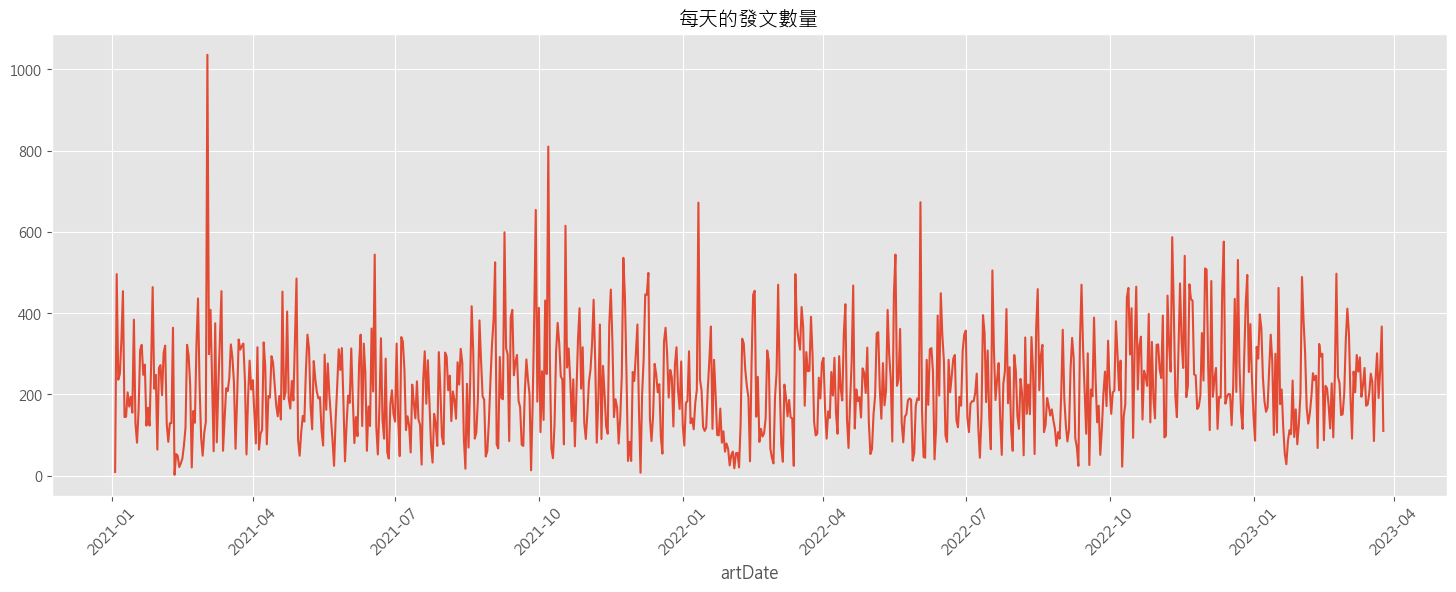

In [22]:
data_datecount = pd.DataFrame(df_.groupby('Date').size(),columns = ['count'])

plt.figure(figsize=(18,6))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式

plt.title('每天的發文數量')
plt.xlabel('artDate')
plt.xticks(rotation= 45, fontsize=11)
plt.plot(data_datecount.index,data_datecount['count'].tolist())

* 正負向情緒分數聲量折線圖圖

In [23]:
#文章和與LIWC情緒字典做合併
data_liwc = pd.merge(df_token, df_liwc, on=['word'],how='left')

#算出每天情緒總和(sentiment_count)
sentiment_count = data_liwc.groupby(['Date','sentiments'],as_index=False).size()
sentiment_count.head()

,Date,sentiments,size
0,2021-01-03,negative,1
1,2021-01-03,positive,1
2,2021-01-04,negative,28
3,2021-01-04,positive,50
4,2021-01-05,negative,4


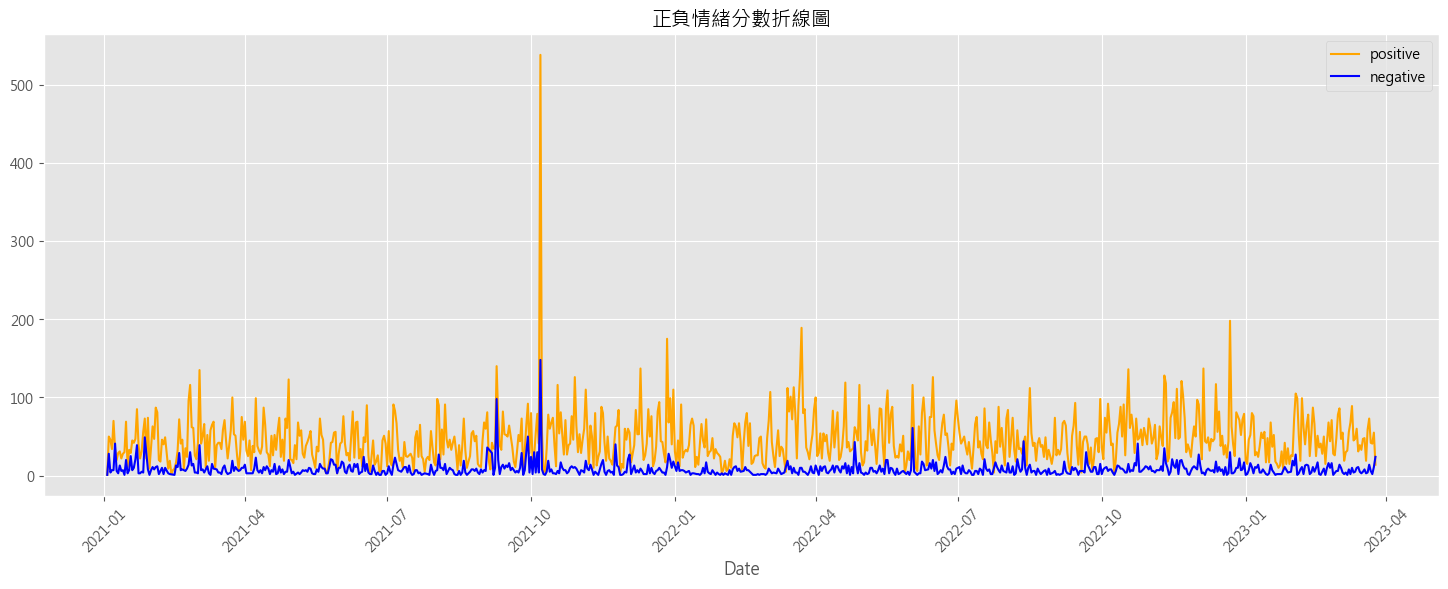

In [24]:
p = sentiment_count[sentiment_count['sentiments']=='positive']
n = sentiment_count[sentiment_count['sentiments']=='negative']

plt.figure(figsize=(18,6))   # 顯示圖框架大小 (寬,高)
# plt.style.use("default")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒分數折線圖')
plt.plot(p['Date'].tolist(), p['size'], label='positive',color="orange")
plt.plot(n['Date'].tolist(), n['size'], label='negative',color="blue")
plt.xticks(rotation= 45, fontsize=10)
plt.legend() #顯示圖例
#plt.axvline(x='2021-03-18', color="red", ls="-")
plt.xlabel('Date')
plt.show()

* 正負向情緒分數比例折線圖圖

In [25]:
sentiment_count_r = sentiment_count.assign(ratio = sentiment_count.groupby(['Date'], as_index=False)
                                           .apply(lambda x: x['size'] / sum(x['size'])).reset_index(level=0, drop=True))

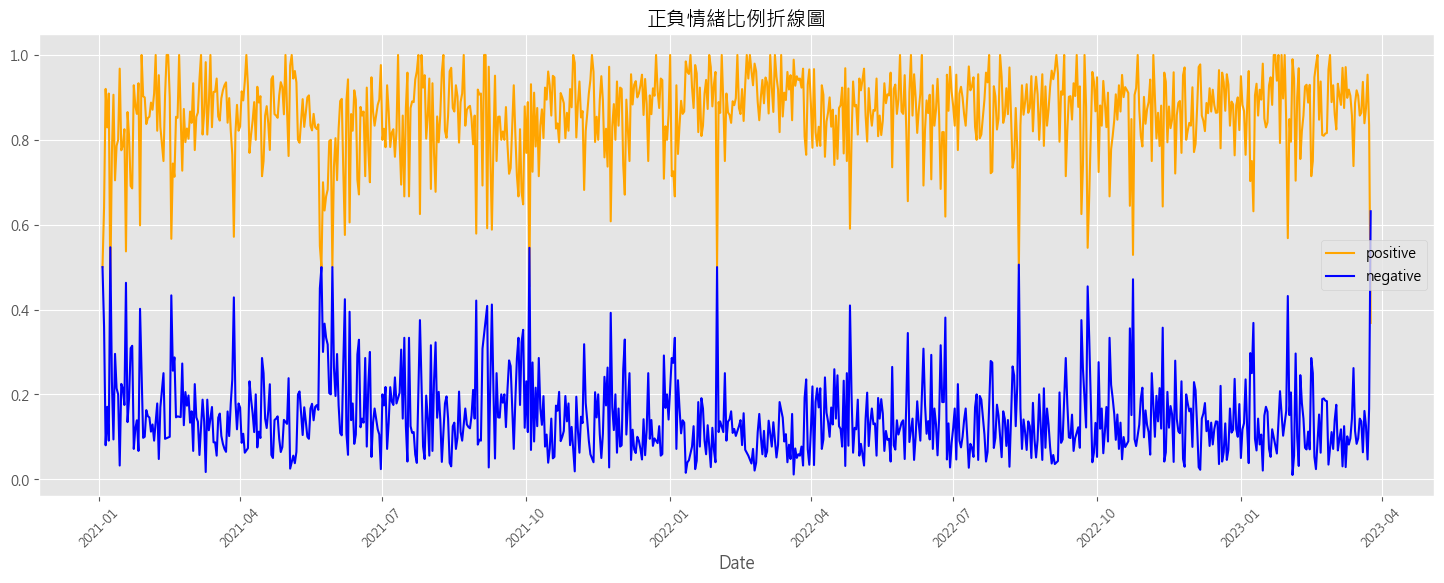

In [26]:
# sentiment_count_r = sentiment_count_r[sentiment_count_r['Date'] > '2021/03/13']
p = sentiment_count_r[sentiment_count_r['sentiments']=='positive']
n = sentiment_count_r[sentiment_count_r['sentiments']=='negative']

plt.figure(figsize=(18,6))   # 顯示圖框架大小 (寬,高)
# plt.style.use("default")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒比例折線圖')
plt.plot(p['Date'].tolist(), p['ratio'], label='positive',color="orange")
plt.plot(n['Date'].tolist(), n['ratio'], label='negative',color="blue")
plt.xticks(rotation= 45, fontsize=9)
plt.legend() #顯示圖例
# plt.axvline(x=datetime.strptime('2021-03-18', "%Y-%m-%d"), color="red", ls="-")
# plt.axvline(x=datetime.strptime('2021-03-19', "%Y-%m-%d"), color="red", ls="-")
# plt.axvline(x=datetime.strptime('2021-03-25', "%Y-%m-%d"), color="red", ls="-")
# plt.axvline(x=datetime.strptime('2021-03-26', "%Y-%m-%d"), color="red", ls="-")
plt.xlabel('Date')
plt.show()

* 文字雲

In [31]:
def Wc_dict(df, Date, countB, countS):
    wc_df = (df.query('Date == @Date') # 篩選日期
             .query('size < @countB')# 篩選最大數量
             .query('size > @countS')# 篩選最小數量
             .sort_values('size', ascending=False))
    wc_dict = dict(zip(wc_df['word'], wc_df['size'])) #建立成dictionary
    
    return wc_dict

In [46]:
# dict_0317 = Wc_dict(word_count,"2020-12-31",440,100)

# font = './SourceHanSansTW-Regular.otf' #中文字型路徑
# wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
# wordcloud.generate_from_frequencies(dict_0317)
# plt.figure(figsize = (14,7))
# plt.imshow(wordcloud)
# plt.axis("off") #把作圖的座標軸關掉 
# plt.show()

* 情緒代表字

In [30]:
sentiment_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['word', 'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))
sentiment_sum = sentiment_sum.sort_values(by=['size'], ascending=False)  #排序
sentiment_sum.head()

,word,sentiments,size
24,優惠,positive,1606
100,感謝,positive,1011
132,智慧,positive,868
122,支持,positive,627
12,保證,positive,389


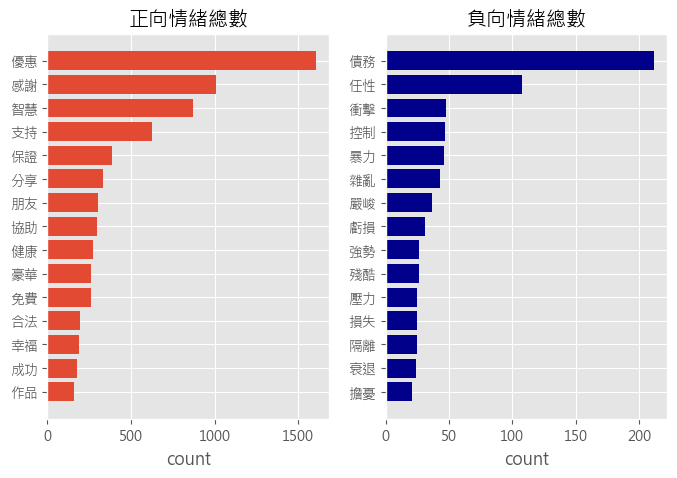

In [31]:
p_sum = sentiment_sum[sentiment_sum["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_sum[sentiment_sum["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
# plt.style.use("ggplot")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

* 歸類正負面文章

In [38]:
article_type = (df_token.merge(df_liwc, on='word')
                .groupby(['artUrl', 'sentiments'], as_index=False)
                .size()
                .pivot_table(index='artUrl', columns='sentiments', values='size', fill_value=0)
                .reset_index(['artUrl'])
               )
article_type.head()

sentiments,artUrl,negative,positive
0,https://fb.com/100175121578758_609005287362403,1,5
1,https://fb.com/100352763387884_5190523571037419,1,1
2,https://fb.com/100639426653043_3899118303471784,3,3
3,https://fb.com/100639426653043_3899744816742466,4,7
4,https://fb.com/100639426653043_3974063292643951,0,1


In [39]:
article_type['type'] = article_type.apply(lambda x: 'positive' if x['positive'] > x['negative'] else 'negative',axis=1)
article_type.groupby('type', as_index=False).size()

,type,size
0,negative,1331
1,positive,8564


In [40]:
df_token

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count,word,Date,time
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,第七屆內科千人捐血活動今天開始,146,第七屆,2022-08-24,02:29:31
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,第七屆內科千人捐血活動今天開始,146,內科,2022-08-24,02:29:31
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,第七屆內科千人捐血活動今天開始,146,千人,2022-08-24,02:29:31
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,第七屆內科千人捐血活動今天開始,146,捐血,2022-08-24,02:29:31
0,2022-08-24 02:29:31,https://fb.com/202188887719_616801973140620,https://fb.com/202188887719,高嘉瑜,第七屆內科千人捐血活動今天開始,146,活動,2022-08-24,02:29:31
...,...,...,...,...,...,...,...,...,...
2535,2022-11-02 20:59:00,https://fb.com/180779498732409_493583689454611,https://fb.com/180779498732409,「我可能不會gg」,鴻海MODEL T開進台南！電動公車「3路線」曝光 | LIFE生活網,0,公車,2022-11-02,20:59:00
2535,2022-11-02 20:59:00,https://fb.com/180779498732409_493583689454611,https://fb.com/180779498732409,「我可能不會gg」,鴻海MODEL T開進台南！電動公車「3路線」曝光 | LIFE生活網,0,路線,2022-11-02,20:59:00
2535,2022-11-02 20:59:00,https://fb.com/180779498732409_493583689454611,https://fb.com/180779498732409,「我可能不會gg」,鴻海MODEL T開進台南！電動公車「3路線」曝光 | LIFE生活網,0,曝光,2022-11-02,20:59:00
2535,2022-11-02 20:59:00,https://fb.com/180779498732409_493583689454611,https://fb.com/180779498732409,「我可能不會gg」,鴻海MODEL T開進台南！電動公車「3路線」曝光 | LIFE生活網,0,LIFE,2022-11-02,20:59:00


* 正負情緒文章數量統計圖

In [41]:
article_type_date = article_type.merge(df_token.loc[:,["artUrl", "Date"]], how = 'left', on = 'artUrl')
article_type_date = article_type_date.groupby(['Date','type'], as_index=False).size()

In [88]:
type(article_type_date["Date"][0])

datetime.date

In [42]:
article_type_date[(article_type_date['Date']>=datetime.strptime("2022-10-01", '%Y-%m-%d').date())&(article_type_date["Date"]<=datetime.strptime("2023-04-25", '%Y-%m-%d').date())]

,Date,type,size
1070,2022-10-01,negative,179
1071,2022-10-01,positive,1117
1072,2022-10-02,negative,465
1073,2022-10-02,positive,554
1074,2022-10-03,negative,333
...,...,...,...
1365,2023-03-23,positive,986
1366,2023-03-24,negative,143
1367,2023-03-24,positive,1644
1368,2023-03-25,negative,796


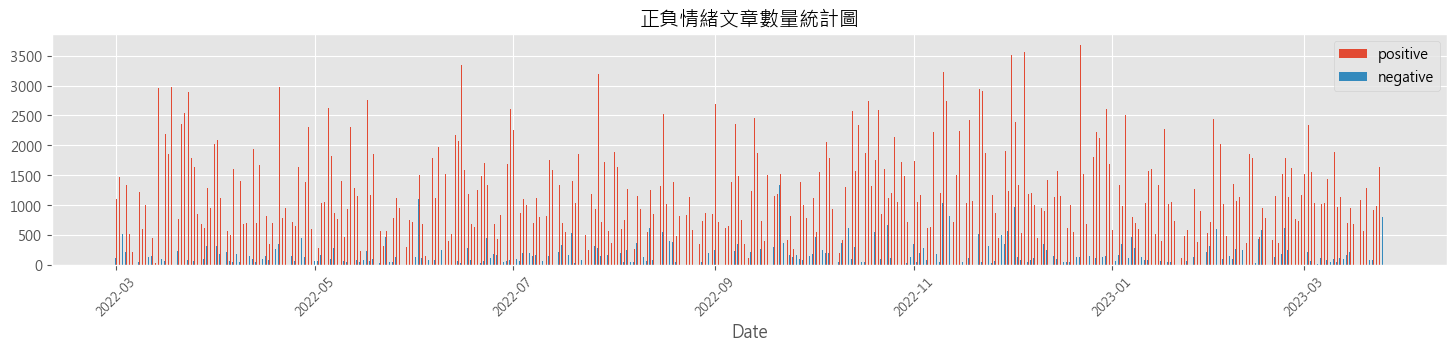

In [43]:
ap = article_type_date[(article_type_date["type"]=="positive")&(article_type_date["Date"]>=datetime.strptime("2022-03-01", '%Y-%m-%d').date())]
an = article_type_date[(article_type_date["type"]=="negative")&(article_type_date["Date"]>=datetime.strptime("2022-03-01", '%Y-%m-%d').date())]

# ap = article_type_date[(article_type_date["type"]=="positive")]
# an = article_type_date[(article_type_date["type"]=="negative")]

plt.figure(figsize=(18,3))   # 顯示圖框架大小 (寬,高)
# plt.style.use("ggplot")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒文章數量統計圖')
plt.xlabel('Date')
plt.bar(ap['Date'],ap['size'],align="edge",width=0.25,label="positive")
plt.bar(an['Date'],an['size'],align="edge",width=-0.25,label="negative")
plt.legend()
plt.xticks(rotation= 45, fontsize=9)
plt.xlabel('Date')
plt.show()

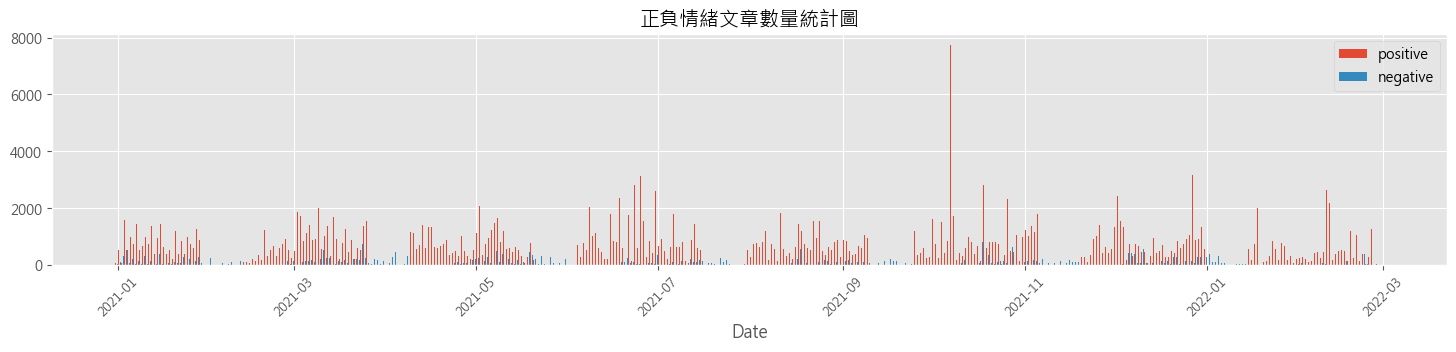

In [112]:
ap = article_type_date[(article_type_date["type"]=="positive")&(article_type_date["Date"]<=datetime.strptime("2022-03-01", '%Y-%m-%d').date())]
an = article_type_date[(article_type_date["type"]=="negative")&(article_type_date["Date"]<=datetime.strptime("2022-03-01", '%Y-%m-%d').date())]

# ap = article_type_date[(article_type_date["type"]=="positive")]
# an = article_type_date[(article_type_date["type"]=="negative")]

plt.figure(figsize=(18,3))   # 顯示圖框架大小 (寬,高)
# plt.style.use("ggplot")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒文章數量統計圖')
plt.xlabel('Date')
plt.bar(ap['Date'],ap['size'],align="edge",width=0.25,label="positive")
plt.bar(an['Date'],an['size'],align="edge",width=-0.25,label="negative")
plt.legend()
plt.xticks(rotation= 45, fontsize=9)
plt.xlabel('Date')
plt.show()

In [ ]:
df_data

In [32]:
pd.DataFrame(df_data.groupby("artPoster")['artPoster'].count()).artPoster.sort_values(ascending=False)[:50]

artPoster
永晟車業【SBC經銷商】                           526
台灣賓士授權經銷商-中華賓士                         492
Yahoo奇摩汽車機車                            480
U-CAR網路汽車共和國                           415
李政峰の匯豐汽車粉絲團                            356
udn發燒車訊                                343
匯豐汽車桃園營業所                              262
KingAutos 國王車訊                         247
自由時報汽車頻道                               228
匯豐汽車 30888                             227
地球黃金線                                  201
7car 小七車觀點                             198
小老婆汽機車資訊網                              197
宇峰車用影音多媒體                              178
MINI韓利樺x高雄汎德                           178
ETtoday車雲                              149
Mobile01                               147
匯豐汽車北港營業所                              124
匯豐汽車北投營業所                              122
中華賓士原廠精選中古車Meceds-Benz select 關渡分公司    111
CarStuff人車事                            106
ETtoday姊妹雲                              99
Sum新國隆汽車                                96
匯

In [35]:
# df_data[df_data.artPoster=='永晟車業【SBC經銷商】'][:50]#
# df_data[df_data.artPoster=='台灣賓士授權經銷商-中華賓士'][:50]
df_data[df_data.artPoster=='Yahoo奇摩汽車機車'][:50]

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
76,2022-01-21 00:00:00,https://fb.com/208766099163797_7136345626405775,https://fb.com/208766099163797,Yahoo奇摩汽車機車,內湖的車友又多一個可以好好逛逛的地方了！\n太古汽車集團在台經營超過40年，近年來結合數位智...,0
83,2022-11-23 06:40:00,https://fb.com/208766099163797_8628970580476598,https://fb.com/208766099163797,Yahoo奇摩汽車機車,從收車、整備、賣車到售後服務，皆可擁有好車雲所提供的最佳信賴服務！\n在台經營汽車產業達40...,1
162,2022-07-10 11:40:03,https://fb.com/208766099163797_7978945588812437,https://fb.com/208766099163797,Yahoo奇摩汽車機車,原大順服務中心搬遷至 Volkswagen 高雄民族服務中心，總佔地面積 620 坪將帶給消...,1
169,2022-07-27 13:45:03,https://fb.com/208766099163797_8060351710671824,https://fb.com/208766099163797,Yahoo奇摩汽車機車,線上可同步預約免費到府估車、交車，還提供保證收購承諾！\n在台經營汽車產業達40餘年的太古汽...,0
170,2022-07-13 01:00:01,https://fb.com/208766099163797_7991813517525644,https://fb.com/208766099163797,Yahoo奇摩汽車機車,位於高雄的 VW 民族服務中心，不只總佔地面積 620 坪，更依照德國原廠標準設計，導入 N...,0
178,2022-04-20 09:00:01,https://fb.com/208766099163797_7593200660720267,https://fb.com/208766099163797,Yahoo奇摩汽車機車,T-Roc 金屬莫蘭迪綠全新車色同步展出，士林區的 VW 車迷準備前來朝聖！\n台灣福斯汽車...,0
180,2022-07-26 11:00:04,https://fb.com/208766099163797_8056515351055460,https://fb.com/208766099163797,Yahoo奇摩汽車機車,提供業界最優的 30 天六大系統保固，同時保固最高可延長至 180 天，保固期限長、範圍最廣...,0
184,2022-07-13 12:00:04,https://fb.com/208766099163797_7991978517509144,https://fb.com/208766099163797,Yahoo奇摩汽車機車,全新 VW 民族服務中心不只設有 10 區工位，讓車主享受專屬的回廠保修空間，搭配專業的技師...,0
261,2021-02-23 11:00:26,https://fb.com/208766099163797_5345740825466273,https://fb.com/208766099163797,Yahoo奇摩汽車機車,預計同時間可展出19輛車款\n👉最新上架車款：https://autos.yahoo.com...,20
1716,2021-02-18 07:00:23,https://fb.com/208766099163797_5322097704497252,https://fb.com/208766099163797,Yahoo奇摩汽車機車,一齊為台灣賽車爭光\n👉最新上架車款：https://autos.yahoo.com.tw/...,0


In [36]:

df_data[df_data.artContent.str.contains('晶片短缺')]

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
280,2021-12-13 05:20:00,https://fb.com/158495994283_10159949342229284,https://fb.com/158495994283,數位時代,全球受到車用晶片短缺、海運塞港以及運價飆漲等影響貨源不穩定，不過保時捷、BMW等豪華車在台灣...,26
392,2022-04-04 23:30:00,https://fb.com/179043295447791_5328058433879559,https://fb.com/179043295447791,經濟日報,疫情、晶片短缺等因素，在2021一整年困擾著全球汽車產業，以代理BMW、保時捷聞名的進口車經...,1
571,2022-03-28 05:18:00,https://fb.com/158495994283_10160124007574284,https://fb.com/158495994283,數位時代,不受疫情、晶片短缺等干擾，代理BMW、保時捷的進口車經銷商「汎德永業」在2021年成績斐然，...,0
1866,2022-01-24 00:45:28,https://fb.com/2024723011088608_3323987391162157,https://fb.com/2024723011088608,中華賓士原廠精選中古車Meceds-Benz select 關渡分公司,今日入庫2台！請大家参考、晶片短缺嚴重、缺🚗中⋯有興趣要快喔⋯⋯\n\nPhotos fro...,0
2908,2023-01-08 00:32:41,https://fb.com/242305665805605_6484148451621264,https://fb.com/242305665805605,ETtoday新聞雲,距離買車...又更遠一大步了QQ（#瑪姬麻吉）\n疫情延燒3年來，挾著中美貿易戰、俄烏戰爭，...,428
...,...,...,...,...,...,...
1106,2022-02-17 03:08:04,https://fb.com/433020080075675_5391206884256945,https://fb.com/433020080075675,日盛期貨580期權學堂,《熱門族群》漲聲來敲門 汽車續飆風\n\n車用晶片短缺尚未全然解決，產業持續壟罩缺車陰霾，加...,0
1571,2022-06-08 23:07:28,https://fb.com/186208612059835_963730524307636,https://fb.com/186208612059835,股人阿勳,#台灣第一大AM車燈製造商\n✅ 帝寶 (6605\n 成立於 1980 年，...,10
1759,2022-06-29 12:01:14,https://fb.com/120869137965597_5405950589457399,https://fb.com/120869137965597,SEMI 國際半導體產業協會,📢 【SEMI Auto IC Master車用晶片指南】正式發表🤩\n\n#SEMI國際半...,4
1876,2021-01-27 06:02:51,https://fb.com/100639426653043_3899744816742466,https://fb.com/100639426653043,非凡電視台,0127 #收盤 #重點\n📍非凡推出─台股盤勢即時直播─啦 不用怕人在外頭錯過最新消息，敬...,0


In [37]:
df_data[df_data.artContent.str.contains('徵才|實習')]

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
6,2021-09-09 04:44:08,https://fb.com/172380132920496_2062948047197019,https://fb.com/172380132920496,紅樹林新聞,淡水又要多一所大學囉！#智慧電動車\n\n🎓華夏科技大學淡海校區🎓\n🏢教育訓練綜合大樓🏢\...,13
28,2021-06-18 11:00:18,https://fb.com/388034991650151_1216487488804893,https://fb.com/388034991650151,Volvo 商用車,\n【Volvo Trucks 專業 X 熱誠．業務專訪】\n \n北區業代-陳榮信\n從工...,3
71,2021-09-09 06:30:42,https://fb.com/233460553764580_1289518621492096,https://fb.com/233460553764580,淡海新市宜居&鷹眼視角觀測報,紅樹林新聞\n1 小時 · \n淡水又要多一所大學囉！#智慧電動車\n🎓華夏科技大學淡海校...,2
117,2021-09-12 03:00:08,https://fb.com/347498705649663_1494823894250466,https://fb.com/347498705649663,Pcars人與車,\n華夏科大攜手太古汽車 培育電動車保修人才\n\n華夏科技大學去年正式成立智慧車輛系，並宣...,0
129,2021-11-11 02:28:06,https://fb.com/273576396089085_4517601561686526,https://fb.com/273576396089085,欣訊捷實業有限公司,\n培育電動車保修人才，華夏與太古產學結盟\n\n去年成立智慧車輛系的華夏科大，與太古汽車產...,0
...,...,...,...,...,...,...
1351,2022-12-12 01:55:43,https://fb.com/183214805043500_639205474665928,https://fb.com/183214805043500,大台北新聞,泰山高中「汽車醫美教學中心」和四所科大簽訂汽車醫美MOU合作計畫，新北市教育局長張明文出席見...,0
1503,2021-02-11 09:30:27,https://fb.com/107207125979624_4079089255458038,https://fb.com/107207125979624,Anue鉅亨網財經新聞,鴻海近年積極轉型，人才招募也朝 3+3 方向推動，而今年再強攻電動車下，與裕隆合資成立的鴻華...,5
2326,2022-07-24 12:00:04,https://fb.com/198132907033890_2137490336431461,https://fb.com/198132907033890,大學生找實習,＃賓士 ＃鴻華 汽車業徵實習生啦！🚙\n搶先卡位>> https://lihi1.com/V...,0
2433,2022-12-30 00:34:24,https://fb.com/337028506344652_566751622134291,https://fb.com/337028506344652,彭忠義/義傑資產管理地政士事務所/新竹市地政士公會第四屆理事長,12/30（五）國內外財經焦點\n\n祝週末愉快\n\n台積電 南科3奈米量產 Fab 18...,0


In [47]:
print(df_data[df_data.artContent.str.contains('品牌')].shape)
print(df_data[df_data.artContent.str.contains('股票')].shape)
print(df_data[df_data.artContent.str.contains('電動車|純電|鴻海')].shape)
print(df_data[df_data.artContent.str.contains('徵才|實習')].shape)
print(df_data[df_data.artContent.str.contains('建教合作|建教|參訪|參觀')].shape)
print(df_data[df_data.artContent.str.contains('駕馭|體驗|抽獎|抽|好禮|車輛資訊|車輛|品質')].shape)
print(df_data[df_data.artContent.str.contains('尾牙')].shape)
print(df_data[df_data.artContent.str.contains('科技|性能|省油|馬力|動力|操控|外觀')].shape)
print(df_data[df_data.artContent.str.contains('安全|堅固|舒適')].shape)
print(df_data[df_data.artContent.str.contains('百萬內')].shape)

(1398, 6)
(70, 6)
(1714, 6)
(164, 6)
(110, 6)
(3375, 6)
(30, 6)
(3587, 6)
(1730, 6)
(77, 6)


In [54]:
df_01 = df_data[df_data.artContent.str.contains('和泰汽車')]
df_02 = df_data[df_data.artContent.str.contains('中華賓士')]
df_03 = df_data[df_data.artContent.str.contains('汎德永業')]
df_04 = df_data[df_data.artContent.str.contains('太古汽車')]
df_05 = df_data[df_data.artContent.str.contains('匯豐汽車')]
df_06 = df_data[df_data.artContent.str.contains('中華汽車')]
df_07 = df_data[df_data.artContent.str.contains('福特六和')]
df_08 = df_data[df_data.artContent.str.contains('台灣本田')]
df_09 = df_data[df_data.artContent.str.contains('鴻華先進')]
df_10 = df_data[df_data.artContent.str.contains('國瑞汽車')]
df_11 = df_data[df_data.artContent.str.contains('三陽工業')]

和泰汽車

In [62]:
print(df_01[df_01.artContent.str.contains('品牌')].shape)
print(df_01[df_01.artContent.str.contains('股票')].shape)
print(df_01[df_01.artContent.str.contains('電動車|純電|鴻海')].shape)
print(df_01[df_01.artContent.str.contains('徵才|實習')].shape)
print(df_01[df_01.artContent.str.contains('建教合作|建教|參訪|參觀')].shape)
print(df_01[df_01.artContent.str.contains('駕馭|體驗|抽獎|抽|好禮|車輛資訊|車輛|品質')].shape)
print(df_01[df_01.artContent.str.contains('科技|性能|省油|馬力|動力|操控|外觀')].shape)
print(df_01[df_01.artContent.str.contains('安全|堅固|舒適')].shape)
print(df_01[df_01.artContent.str.contains('百萬內')].shape)

(333, 6)
(6, 6)
(215, 6)
(50, 6)
(17, 6)
(390, 6)
(558, 6)
(255, 6)
(1, 6)


中華賓士

In [63]:
print(df_02[df_02.artContent.str.contains('品牌')].shape)
print(df_02[df_02.artContent.str.contains('股票')].shape)
print(df_02[df_02.artContent.str.contains('電動車|純電|鴻海')].shape)
print(df_02[df_02.artContent.str.contains('徵才|實習')].shape)
print(df_02[df_02.artContent.str.contains('建教合作|建教|參訪|參觀')].shape)
print(df_02[df_02.artContent.str.contains('駕馭|體驗|抽獎|抽|好禮|車輛資訊|車輛|品質')].shape)
print(df_02[df_02.artContent.str.contains('科技|性能|省油|馬力|動力|操控|外觀')].shape)
print(df_02[df_02.artContent.str.contains('安全|堅固|舒適')].shape)
print(df_02[df_02.artContent.str.contains('百萬內')].shape)

(112, 6)
(6, 6)
(40, 6)
(4, 6)
(10, 6)
(500, 6)
(522, 6)
(412, 6)
(1, 6)


In [52]:
tmp = df_data[df_data.artContent.str.contains('電動巴士')]
# print(tmp[tmp.artContent.str.contains('電')].shape)
# tmp[tmp.artContent.str.contains('電')]
print(tmp.shape)
tmp


(362, 6)


,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
4807,2023-03-22 12:02:01,https://fb.com/211031385628516_6279956812069246,https://fb.com/211031385628516,Taipei AMPA / Autotronics Taipei,\n「台北國際汽機車零配件展TAIPEI AMPA」、「台北國際車用電子展AUTOTRONI...,2
1157,2022-04-07 12:30:00,https://fb.com/303911685570_10166761153105571,https://fb.com/303911685570,財訊,東元總座交接！現年60歲、福特六和前總裁范炘空降接任總經理，東元接下來不只電動貨卡、電動巴士...,17
2726,2021-10-18 09:52:04,https://fb.com/158495994283_10159845340884284,https://fb.com/158495994283,數位時代,鴻海在科技日上，向外界展示了兩款乘用車、一款商用電動巴士，共三款的原型車，納智捷（Luxge...,38
2782,2021-10-18 09:26:04,https://fb.com/481065478629613_4405252489544206,https://fb.com/481065478629613,The News Lens 關鍵評論網,#關鍵新聞 國產電動車要來了嗎？鴻海公布Model C電動車、Model E電動車與Mode...,47
2856,2021-10-18 04:19:15,https://fb.com/785015298263057_4292100104221208,https://fb.com/785015298263057,TopGear TW 極速誌,【國造電動大平台】\n\n今天的鴻海科技日帶來Model E、Model C(SUV)以及M...,15
...,...,...,...,...,...,...
2513,2022-06-14 13:50:20,https://fb.com/1739930682909927_3214050848831229,https://fb.com/1739930682909927,BRT長輩老人經文圖,鴻海電動巴士「Model T」，獲核定15輛車\n「便當盒」降落！台南府城客運再引進15輛鴻...,0
2514,2022-06-14 02:18:24,https://fb.com/389692711425618_1545275492533995,https://fb.com/389692711425618,勝利之聲廣播公司,\n「便當盒」降落！台南市獲交通部核定15輛電動巴士 引進鴻華先進「Model T」\n\n...,0
2525,2022-09-21 10:51:03,https://fb.com/1739930682909927_3286715634898083,https://fb.com/1739930682909927,BRT長輩老人經文圖,公車電動化加速！北市336輛電動公車上路，目標年底達400輛\n\n王喻歆\n\n臺北市交通...,0
2527,2022-10-13 06:14:48,https://fb.com/1739930682909927_3306928479543465,https://fb.com/1739930682909927,BRT長輩老人經文圖,府城客運 鴻華Model T電動巴士15輛\n鴻華Model T電動巴士台南交車 年底陸續上...,0


In [20]:
(df_[df_.artContent.str.contains('購車|購買|購入|購')]).to_csv("fb_buy.csv", encoding="utf-8-sig")

In [57]:
df_buy = df_01[df_01.artContent.str.contains('購車|購買|購入|購')]
df_buy.shape

(294, 6)

In [59]:
pd.DataFrame(df_buy.groupby("artPoster")['artPoster'].count()).artPoster.sort_values(ascending=False)

artPoster
TOYOTA Taiwan     29
U-CAR網路汽車共和國      14
中部TOYOTA汽車        13
Yahoo奇摩汽車機車       12
七期市政 Used Cars    12
                  ..
你不知道的真相            1
今周刊                1
中部 LEXUS 汽車        1
中時新聞網              1
龐德                 1
Name: artPoster, Length: 117, dtype: int64

In [56]:
df_buy[df_buy.artPoster=='Luxgen Motor']

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count


In [37]:
pd.DataFrame(df_.groupby("artPoster")['artPoster'].count()).artPoster.sort_values(ascending=False)[50:100]

artPoster
廖怡塵                    30
楊勇緯 Yang Yung Wei      30
TSNA                   29
G7 車庫柒號                28
萬華分局莒光派出所              27
Yahoo!奇摩新聞             27
Hubert28 空中攝影世界        26
比德堡【崁入式】晴雨窗            26
籃球筆記                   25
商業周刊（商周.com）           25
Moto7 專業汽機車資訊          25
Luxgen北智捷汽車            24
裕新汽車生活誌                24
WOWSight               24
Hank汽車部落格              24
艾迪楊的愛車誌                24
三菱認證中古車-菱威汽車           23
Cs-車宮車業                23
佳馬汽車商行                 23
天下雜誌                   22
大將軍豪洨專區-什麼都聊廢文區        22
栽滋味滷味王                 22
一手車訊                   22
狂人日誌：MadVnz            22
數位時代                   22
Luxgen新莊汽車生活館          21
西瓜嚴選精品汽車               21
邢男 邢雨龍                 21
Luxgen 新竹汽車生活館         20
Yahoo奇摩運動              20
中時新聞網 汽車頻道             19
ETtoday運動雲             19
汽車碰撞道路實測               19
yes123求職網              19
Auto Online 汽車線上       19
清大 Career 報報           19
Chinese Taipei 中華男籃    18
亞路行動百貨                 18
Te

In [82]:
df_[:5]

,system_id,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
0,1,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,\n【快訊】#阿布達比大滿貫賽🥋\n恭喜 勇緯摘下個人生涯第一面大滿貫賽金牌🥇\n—\n #...,2213
1,2,2022-04-01 14:55:31,https://fb.com/114009453350823_362101982595840,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,\n🎊 恭喜 勇緯奪得 #2022安塔利亞大滿貫賽 金牌🥇\n－\n 2022年好的開始\n...,1060
2,3,2022-06-24 09:57:56,https://fb.com/114009453350823_417345683738136,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,\n【快訊】\n🎊 恭喜 勇緯奪得 #2022烏蘭巴托大滿貫賽 銀牌🥈\n比賽辛苦了👏🏼👏🏼...,729
3,4,2022-08-04 11:47:35,https://fb.com/114009453350823_445920040880700,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,\n【快訊】\n 恭喜 勇緯奪得 #2022哈薩克亞洲柔道錦標賽 銅牌🥉\n\n勇緯、真豪兩...,416
4,5,2021-12-22 00:00:00,https://fb.com/596023980420209_4748332441855988,https://fb.com/596023980420209,來趣新北金發局,來趣新北金發局 is at 我的新北市.\n【🎉#新北振興加倍奉還 第一波登錄發票 #中獎公...,2647


In [84]:
df_[df_.index==1]

,system_id,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
1,2,2022-04-01 14:55:31,https://fb.com/114009453350823_362101982595840,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,\n🎊 恭喜 勇緯奪得 #2022安塔利亞大滿貫賽 金牌🥇\n－\n 2022年好的開始\n...,1060
1,2,2022-10-01 04:00:07,https://fb.com/601181809942988_5712544455473339,https://fb.com/601181809942988,Luxgen Motor,\n【抽獎文 - n⁷純電代言人⚡️出席鴻海科技日】\n\nLUXGEN全新世代電動車n ⁷...,1449
1,2,2022-10-18 08:16:30,https://fb.com/147510625272443_680978470053290,https://fb.com/147510625272443,毒舌痞子的543日記,\n延續最近延燒的合法國產掀頂露營車話題，簡單來說，中華汽車賣A180，出具“原廠認證”，阡...,958


In [75]:
(df_[df_.system_id==231])

,system_id,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
230,231,2022-12-22 14:00:55,https://fb.com/116153345102198_5916157075101767,https://fb.com/116153345102198,Option改裝車訊,"最後的GT-R R35?\n北美Nissan發佈「不停產!」,GT-R 2023年車型驚喜登...",79
230,231,2021-07-09 04:00:40,https://fb.com/601181809942988_4330935916967540,https://fb.com/601181809942988,Luxgen Motor,\n【因為有要保護的人，所以我不害怕】\n在「裕隆集團抗疫微光專案」裡，我們的任務是在一所已...,6
230,231,2021-06-05 05:41:09,https://fb.com/159687017502304_2336345319836452,https://fb.com/159687017502304,PTT Gossiping 批踢踢八卦板,[新聞] 力挺抗疫！ 裕隆集團捐10部專車及防疫物資逾1500萬 https://dis...,18


In [67]:
df_[df_.artContent.str.contains("裕隆集團抗疫微光專案")]

,system_id,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
3007,3008,2021-07-09 04:00:40,https://fb.com/601181809942988_4330935916967540,https://fb.com/601181809942988,Luxgen Motor,\n【因為有要保護的人，所以我不害怕】\n在「裕隆集團抗疫微光專案」裡，我們的任務是在一所已...,6
3585,3586,2021-07-02 04:00:00,https://fb.com/601181809942988_4318686211525844,https://fb.com/601181809942988,Luxgen Motor,\n【病人的健康交給前線醫護，車子的健康由我們守護!】\n\n記得當初接獲「裕隆集團抗疫微光...,3
230,231,2021-07-09 04:00:40,https://fb.com/601181809942988_4330935916967540,https://fb.com/601181809942988,Luxgen Motor,\n【因為有要保護的人，所以我不害怕】\n在「裕隆集團抗疫微光專案」裡，我們的任務是在一所已...,6
571,572,2021-07-02 04:00:00,https://fb.com/601181809942988_4318686211525844,https://fb.com/601181809942988,Luxgen Motor,\n【病人的健康交給前線醫護，車子的健康由我們守護!】\n\n記得當初接獲「裕隆集團抗疫微光...,3


In [66]:
df_tmp = df_[(df_.artPoster == 'Luxgen Motor')&(df_.artContent.str.contains("維修"))&(~df_.artContent.str.contains("電"))]#電73、
print(len(df_tmp))
df_tmp.artUrl

10


3007    https://fb.com/601181809942988_4330935916967540
3585    https://fb.com/601181809942988_4318686211525844
230     https://fb.com/601181809942988_4330935916967540
347     https://fb.com/601181809942988_4275342959193503
391     https://fb.com/601181809942988_5000549853339473
492     https://fb.com/601181809942988_4296392437088555
571     https://fb.com/601181809942988_4318686211525844
651     https://fb.com/601181809942988_4245835818810884
807     https://fb.com/601181809942988_4684502114944250
812     https://fb.com/601181809942988_5456877107706743
Name: artUrl, dtype: object

In [34]:
pd.DataFrame(df_buy.groupby("artPoster")['artPoster'].count()).artPoster.sort_values(ascending=False)[:50]

artPoster
Luxgen Motor                  103
SBL 超級籃球聯賽                     57
Nissan                         47
Luxgen花蓮汽車生活館                  44
Sum首福汽車-全認証中古車                 39
弘倉汽車 - 中古車買賣（高價收購）             36
Luxgen新店汽車生活館                  34
udn發燒車訊                        31
車水馬龍網                          27
U-CAR網路汽車共和國                   26
比德堡【崁入式】晴雨窗                    26
KingAutos 國王車訊                 26
Yahoo奇摩汽車機車                    24
杰運汽車 Autostar 最透明的買車賣車平台       22
西瓜嚴選精品汽車                       21
亞路行動百貨                         15
經濟日報                           14
Go Choice購車趣                   14
地球黃金線                          14
三菱Mitsubishi Motors Taiwan     12
CHOCOBear 巧克熊環島餐車              10
裕隆納智捷籃球隊                       10
RCi HID LED                    10
7car 小七車觀點                     10
Cs-車宮車業                         9
CARTURE 車勢文化                    9
Zeek玩家誌                         9
見發堆高機 / 建發堆高機                   8
Nissan Taipei-裕信粉絲團             8
三菱認證